# KMeans Clustering
Core


*Christina Brockway*

## Business Understanding

**Task:**
- To perform customer segmentations using KMeans.
- Help the company effectively allocate marketing resources
- Use customer age, education, years of employment, income, debt, whether they defaulted, and debt-to-income ratio to group into segments

**Stakeholder:**
Bank that is trying to allocate marketing material to the most relevent people at the lowest cost.



## Data Understanding:

Using the following dataset: 
https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv

From: 
https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means

### Load Data and Imports:

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import plotly.express as px

In [2]:
# load dataset
credit =  'data/cust_seg.csv'
df = pd.read_csv(credit)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Clean Data

In [3]:
df= df.drop(columns=['Unnamed: 0', 'Customer Id'])


In [4]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [5]:
df['Defaulted']=df['Defaulted'].fillna(2.0)


In [6]:
# Scale the data
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

### Use KMeans to create various customer segments

C:\Users\csbro\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\csbro\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\csbro\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\csbro\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

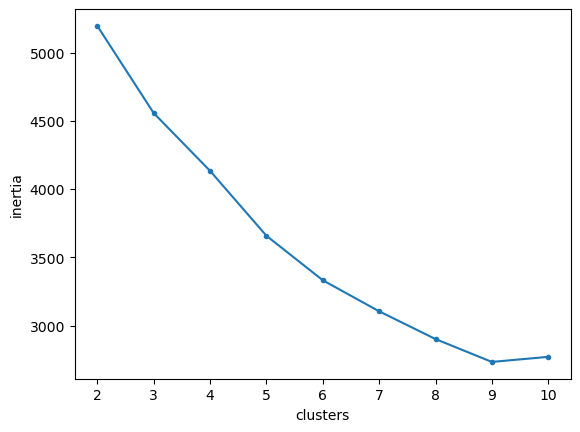

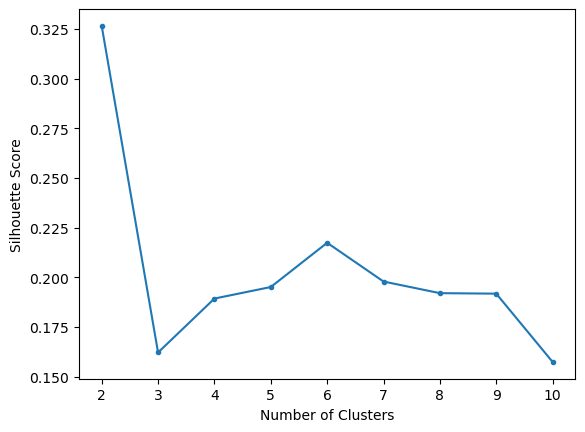

In [7]:
#instantiate KMeans
ks = range(2, 11)

#create empty list for inertias and sils
inertias=[]
sils = []

#Loop through k values for range
for k in ks:
    kmeans= KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(scaled_df, kmeans.labels_))

#Visualize the scores
plt.plot(ks, inertias, marker='.')
plt.xlabel('clusters')
plt.ylabel('inertia');

plt.show()

plt.plot(ks, sils, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

Choose a K based on the results:  Will use K=2

In [8]:
kmeans_model = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans_model.fit(scaled_df)

C:\Users\csbro\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

### Analyze the clusters 

Create analytical visualizations that explore statistics for each feature for each cluster.

In [10]:
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()
#group the dataframe by cluster and aggregate by mean values
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,42.080000,1.540000,17.950000,75.860000,1.468300,2.743940,0.570000,6.099000
1,1,30.391566,1.439759,4.373494,27.698795,0.880331,1.606831,1.524096,9.361446
2,2,39.696629,1.685393,9.797753,48.280899,2.375933,5.821494,0.483146,17.755056
3,3,33.045455,3.488636,4.363636,38.988636,0.914239,2.061795,0.397727,8.242045
4,4,45.225000,1.775000,21.825000,129.500000,4.550075,8.269675,0.300000,11.447500
5,5,39.785714,3.285714,9.928571,108.214286,3.795286,13.385786,0.857143,17.992857
6,6,46.000000,1.777778,22.333333,202.000000,13.888889,19.456111,1.222222,21.755556
7,7,28.283237,1.306358,5.364162,26.445087,0.582237,1.394636,0.000000,7.771098
8,8,31.400000,1.888889,6.777778,41.711111,4.524178,5.148022,1.200000,24.368889
9,9,39.642857,1.269841,8.396825,38.071429,0.721976,1.667079,0.047619,6.586508


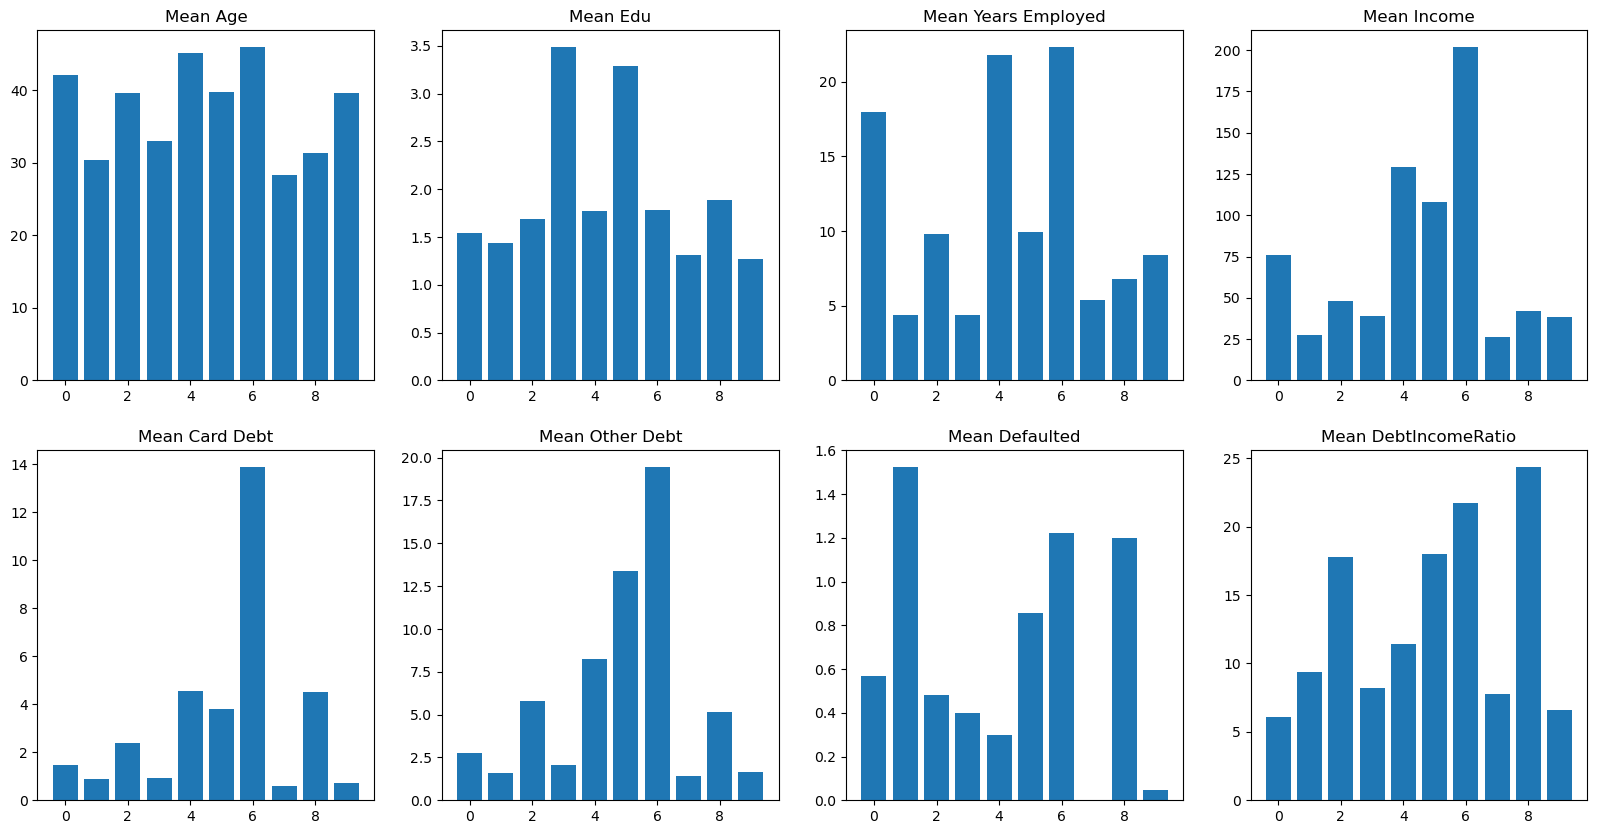

In [12]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 2,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

### Descriptions of each cluster based on the visualizations 

##### Cluster 0:

-Lowest dtbt=